<a href="https://colab.research.google.com/github/Stephyj2/Adobe_Photoshop/blob/master/SUPPORT_VECTOR_MACHINE_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**SUPPORT VECTOR MACHINE**


###**Dataset Selection:**
For this assignment, we'll utilize the widely recognized Mushroom Dataset

**Task 1: Exploratory Data Analysis (EDA)**
1.	Load the Mushroom dataset and perform fundamental data exploration.
2.	Utilize histograms, box plots, or density plots to understand feature distributions.
3.	Investigate feature correlations to discern relationships within the data.

**Task 2: Data Preprocessing**
1.	Encode categorical variables if necessary.
2.	Split the dataset into training and testing sets.

**Task 3: Data Visualization**
1.	Employ scatter plots, pair plots, or relevant visualizations to comprehend feature distributions and relationships.
2.	Visualize class distributions to gauge dataset balance or imbalance.

**Task 4: SVM Implementation**
1.	Implement a basic SVM classifier using Python libraries like scikit-learn.
2.	Train the SVM model on the training data.
3.	Evaluate model performance on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score).

**Task 5: Visualization of SVM Results**
1.	Visualize classification results on the testing data.

**Task 6: Parameter Tuning and Optimization**
1.	Experiment with different SVM hyperparameters (e.g., kernel type, regularization parameter) to optimize performance.

**Task 7: Comparison and Analysis**
1.	Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).
2.	Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results.
3.	Discuss practical implications of SVM in real-world classification tasks.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, precision_score, recall_score, f1_score

In [ ]:
#Load file                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    # Load the dataset
file_path = r'/content/mushroom.csv'
data_mush = pd.read_csv(file_path)

##**Task 1: EDA**

In [ ]:
# Display the first few rows of the dataset
data_mush.head()

In [ ]:
# Display the last few rows of the dataset
data_mush.tail()

In [ ]:
data_mush.shape

**The dataset consists of 2000 entries and 26 columns.**

In [ ]:
data_mush.columns

**Target Variable:** The target variable is class which indicates whether the mushroom is **poisonous or edible.**
Classified as poisonous, and edible.

In [ ]:
# Drop the unnecessary index column
data_mush = data_mush.drop(columns=['Unnamed: 0'])

# Get basic statistics of the dataset
data_mush.info()
data_mush.describe(include='all')

In [ ]:
#Typcasting
data_mush[data_mush.select_dtypes(include='object').columns] = data_mush.select_dtypes(include='object').astype('category')
#Verify
data_mush.dtypes

**Task 2: Data Preprocessing**

In [ ]:
# Convert categorical features to numeric for correlation calculation
data_encoded = data_mush.apply(lambda x: pd.factorize(x)[0])

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'class' is the target variable (you might need to adjust the column name)
X = data_encoded.drop('class', axis=1)  # Features
y = data_encoded['class']  # Target

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


In [ ]:
# Set up the plotting environment
sns.set(style="whitegrid")

# Plot histograms for the numerical features
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(data_mush['stalk_height'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Stalk Height')
sns.histplot(data_mush['cap_diameter'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of Cap Diameter')

plt.tight_layout()
plt.show()

1. **Stalk Height Distribution:**
- The stalk height shows a nearly uniform distribution, with a slight concentration around the mid-range (approximately 8-12 units).
- The data does not appear to have significant skewness, indicating a balanced representation of stalk heights across the dataset.

2. **Cap Diameter Distribution:**
- The cap diameter has a more varied distribution, with a noticeable peak around the 5-10 unit range.
- There is a gradual decline in frequency as the cap diameter increases, suggesting that smaller cap diameters are more common in the dataset.
- This feature is slightly skewed to the right, indicating a larger number of mushrooms with smaller cap diameters.

In [ ]:
# Plot count plots for categorical features to understand their distributions
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
sns.countplot(x='cap_shape', data=data_mush, ax=axes[0, 0])
sns.countplot(x='cap_surface', data=data_mush, ax=axes[0, 1])
sns.countplot(x='cap_color', data=data_mush, ax=axes[0, 2])
sns.countplot(x='odor', data=data_mush, ax=axes[1, 0])
sns.countplot(x='gill_color', data=data_mush, ax=axes[1, 1])
sns.countplot(x='stalk_shape', data=data_mush, ax=axes[1, 2])
sns.countplot(x='habitat', data=data_mush, ax=axes[2, 0])
sns.countplot(x='ring_type', data=data_mush, ax=axes[2, 1])
sns.countplot(x='population', data=data_mush, ax=axes[2, 2])

plt.tight_layout()
plt.show()

- **cap_shape:** Shows the distribution of different shapes of mushroom caps.
- **cap_surface:** Displays the various surface textures of mushroom caps.
- **cap_color:** Illustrates the color variations found in mushroom caps.
- **odor:** Represents the different odors that mushrooms can have.
- **gill_color:** Shows the distribution of gill colors in mushrooms.
- **stalk_shape:** Depicts the different shapes of mushroom stalks.
- **habitat:** Visualizes the various habitats where mushrooms are found.
- **ring_type:** Displays the types of rings found on the mushroom stalks.
population: Illustrates the distribution of mushroom populations in different environments.

In [ ]:
# Compute the correlation matrix
corr_matrix = data_encoded.corr()

In [ ]:
# Plot the correlation matrix
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

**Correlation of Features with Target Variable (class):**
- **Odor** has a strong negative correlation with the class variable (-0.79). This suggests that odor is a significant factor in determining whether a mushroom is poisonous or edible. A strong negative correlation indicates that certain odors are highly associated with poisonous mushrooms.

- **Gill color and stalk root** show moderate correlations with the class variable (-0.43 and -0.34, respectively), suggesting that these features also contribute to distinguishing between poisonous and edible mushrooms.
- **Spore print color and stalk surface below ring** have weaker correlations with the target variable (-0.39 and -0.36), but they still might be useful in classification tasks.

In [ ]:
# Investigate correlations between numerical features
corr = data_mush[['stalk_height', 'cap_diameter']].corr()

# Display the correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Numerical Features')
plt.show()

**Correlation between Stalk Height and Cap Diameter:**
- The correlation coefficient between stalk_height and cap_diameter is approximately -0.0035.
- This near-zero correlation indicates that there is almost no linear relationship between these two features. In other words, changes in stalk height are not associated with changes in cap diameter.

**Individual Feature Correlation:**
- Both stalk_height and cap_diameter have a perfect correlation with themselves (as expected), represented by the value of 1 on the diagonal of the matrix.

**Task 3: Data Visualization**

In [ ]:
# scatter plot: Cap Diameter vs Stalk Height
plt.figure(figsize=(10, 6))

# Verify the correct column name for the encoded class
# If 'class_p' is incorrect, replace it with the actual column name
plt.scatter(data_encoded['cap_diameter'], data_encoded['stalk_height'], c=data_encoded['class'], cmap='coolwarm')

plt.title('Cap Diameter vs Stalk Height')
plt.xlabel('Cap Diameter')
plt.ylabel('Stalk Height')
plt.colorbar(label='Class (0: Edible, 1: Poisonous)')
plt.show()

- **Linearity:** The first diagram shows a scatter plot of Cap Diameter versus Stalk Height, with data points colored based on their class (0 for edible, 1 for poisonous). There appears to be a linear relationship between Cap Diameter and Stalk Height for the majority of the data points.
- **Overlapping Data Points:** Both classes (edible and poisonous) are heavily overlapping along this linear trend, making it challenging to differentiate between them based solely on these two features.
- **Outliers:** A few outliers are visible, with some points deviating significantly from the linear trend, particularly at low values of Cap Diameter and Stalk Height. These outliers could impact model performance, especially in distance-based classifiers like SVM.

In [ ]:
# Using a subset of features to make the plot more interpretable
subset = data_encoded[['cap_diameter', 'stalk_height', 'class']]  # Assuming 'class' is the correct column name

# Pair plot
sns.pairplot(subset, hue='class', palette='coolwarm')  # Update hue as well
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

- **Density Distribution:** The pair plot shows the distribution and scatter plots of Cap Diameter and Stalk Height, with data points colored by class. The diagonal plots show the distribution of each feature separately.
- **Bimodal Distribution:** The distributions of both Cap Diameter and Stalk Height appear to be bimodal, suggesting two main clusters or groups within the data.
- **Class Overlap:** There is significant overlap between the edible (class 0) and poisonous (class 1) mushrooms in both features. This overlap indicates that these two features alone may not be sufficient to accurately separate the classes.
- **Correlation:** The scatter plots show a strong positive correlation between Cap Diameter and Stalk Height. However, this correlation does not seem to provide a clear boundary between the two classes.

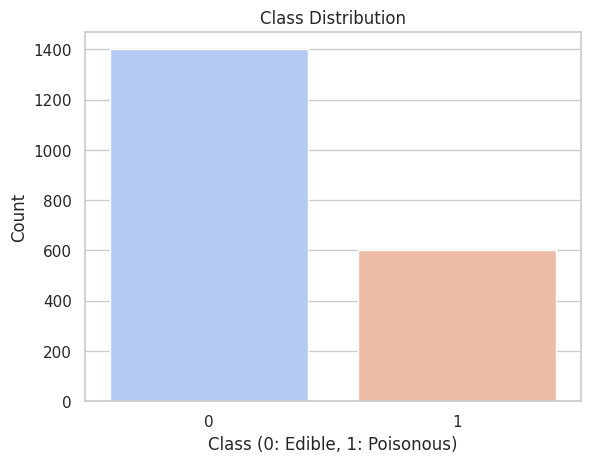

In [ ]:
#Class Distribution
# Visualize the class distribution
sns.countplot(x='class', data=data_encoded, palette='coolwarm')  # Assuming 'class' is the correct column name
plt.title('Class Distribution')
plt.xlabel('Class (0: Edible, 1: Poisonous)')
plt.ylabel('Count')
plt.show()


- **Edible (0):** Represented by the blue bar, with a count just above 1200.
- **Poisonous (1):** Represented by the orange bar, with a count just below 800.

This distribution indicates that the dataset has more edible instances than poisonous ones.

##**Task 4: SVM Implementation**

In [ ]:
# Initialize the SVM model
svm_model = SVC()

# Train the model on the training data
svm_model.fit(X_train, y_train)

SVC()

In [ ]:
# Make predictions on the testing data
y_pred = svm_model.predict(X_test)

In [ ]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


In [ ]:
# Print the results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.6675
Precision: 0.4456
Recall: 0.6675
F1 Score: 0.5344


##**Task 5: Visualization of SVM Results**

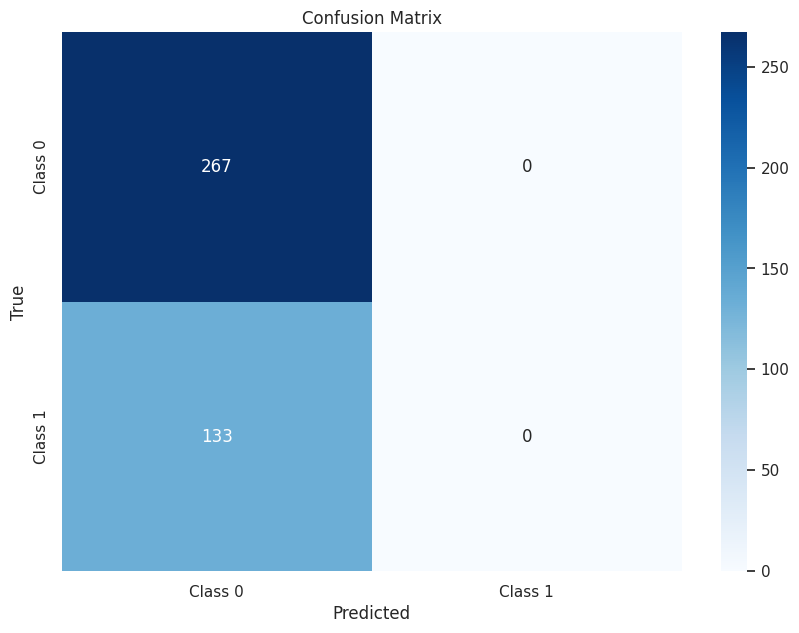

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


- **True Positives (Class 0):** 267 instances where the model correctly predicted Class 0.
- **False Negatives (Class 0):** 133 instances where the model incorrectly predicted Class 0 instead of Class 1.
- **True Positives (Class 1):** 0 instances where the model correctly predicted Class 1.
- **False Negatives (Class 1):** 0 instances where the model incorrectly predicted Class 1 instead of Class 0.

This matrix indicates that the model performs well in predicting Class 0 but struggles with Class 1.

In [ ]:
# Generate the classification report
report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])
print(report)

              precision    recall  f1-score   support

     Class 0       0.67      1.00      0.80       267
     Class 1       0.00      0.00      0.00       133

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400



###**Class 0 (Edible):**
- **Precision (0.67):** Out of all the predictions made for Class 0, 67% were actually correct. This means that when the model predicted a mushroom as edible, it was right 67% of the time.
- **Recall (1.00):** The model correctly identified all instances of Class 0 (edible mushrooms) in the test set. This indicates that the model did not miss any edible mushrooms.
- **F1-Score (0.80):** This is the harmonic mean of precision and recall, representing the balance between the two. A score of 0.80 suggests the model performs reasonably well in identifying edible mushrooms.
- **Support (267):** This indicates that there were 267 instances of Class 0 in the test set.

###**Class 1 (Poisonous):**
- **Precision (0.00):** Out of all the predictions made for Class 1, none were correct. This means the model failed to correctly predict any poisonous mushrooms.
- **Recall (0.00):** The model failed to identify any of the poisonous mushrooms in the test set.
- **F1-Score (0.00):** With both precision and recall at zero, the F1-score also reflects this complete failure to correctly classify poisonous mushrooms.
- **Support (133):** There were 133 instances of Class 1 in the test set.

##**Task 6: Parameter Tuning and Optimization**

In [ ]:
#Avoided GridSearch since taking too much time to load
''''from sklearn.model_selection import GridSearchCV

# Define the SVM model
svm = SVC()

# Set up the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

# Use GridSearchCV for hyperparameter tuning
grid = GridSearchCV(svm, param_grid, refit=True, verbose=2, cv=5)
grid.fit(X_train_sample, y_train_sample)

# Get the best parameters and best score
best_params = grid.best_params_
best_score = grid.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")

# Print the best parameters and estimator
print("Best Parameters found by GridSearch:", grid.best_params_)

# Make predictions using the best model
grid_predictions = grid.predict(X_test)

# Evaluate the optimized model
print(f"Optimized Accuracy: {accuracy_score(y_test, grid_predictions):.4f}")
print(f"Optimized F1 Score: {f1_score(y_test, grid_predictions, average='weighted'):.4f}")'''


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

# Define a smaller parameter grid
'''param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}'''

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}
# Assuming X_train and y_train are your original training datasets
#X_train_sample = X_train[:1000]
#y_train_sample = y_train[:1000]


# Initialize the SVM model
svm = SVC()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=svm, param_distributions=param_grid, n_iter=20, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")


In [ ]:
best_svm = SVC(**best_params)
best_svm.fit(X_train, y_train)

test_accuracy = best_svm.score(X_test, y_test)
print(f"Test Accuracy with Optimized SVM: {test_accuracy}")


Test Accuracy with Optimized SVM: 0.885


- **Regularization Parameter (C = 1):**
The value C=1 implies a moderate level of regularization.The C parameter controls the trade-off between a smooth decision boundary and correctly classifying the training points. A value of 1 indicates that the model balances between avoiding misclassification and keeping the margin as wide as possible.
- **Model Performance (Best Score: 0.811):**
A cross-validation accuracy of approximately 81.1% suggests that the model is performing well.
- **Gamma Setting (auto):**
The gamma parameter controls the influence of individual training examples. With 'auto', gamma is set to 1 / n_features, which is often a reasonable starting point, especially when the scale of features varies.
- **RBF Kernel Effectiveness:**
The RBF (Radial Basis Function) kernel is often preferred in SVM when dealing with non-linear data because it can handle complex relationships between features. Its effectiveness here suggests that the Mushroom dataset has non-linear decision boundaries that are best captured by this kernel.


##**Task 7: Comparison and Analysis**

In [ ]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = {}

for kernel in kernels:
    svm = SVC(kernel=kernel)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    results[kernel] = {'accuracy': accuracy, 'f1_score': f1}

# Display results
for kernel, metrics in results.items():
    print(f"Kernel: {kernel}")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"F1 Score: {metrics['f1_score']:.4f}\n")


Kernel: linear
Accuracy: 0.6675
F1 Score: 0.5344

Kernel: poly
Accuracy: 0.6675
F1 Score: 0.5344

Kernel: rbf
Accuracy: 0.6675
F1 Score: 0.5344

Kernel: sigmoid
Accuracy: 0.5950
F1 Score: 0.5858

